# EDA

In [533]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 1) Scanning and surface data cleaning

In [534]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [535]:
df.shape

(3140, 108)

The dataset consists of 108 columns, which we have to reduce in order to carry out the study.

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [537]:
# Configures Pandas to display full DataFrames without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [538]:
# View all columns without truncation
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [539]:
# Resets the value of pandas to display truncated dataframes
pd.reset_option('all')

/tmp/ipykernel_9850/4261215448.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [540]:
# Obtain null values
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [541]:
# Obtain duplicates
df.duplicated().sum()

0

In [542]:
# Get the columns with data type "object"
object_columns = df.select_dtypes(include=['object']).columns
object_columns


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [543]:
# Converted the categoricals to numericals
for col in object_columns:
    df[col] = pd.factorize(df[col])[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [544]:
# Crear una nueva columna llamada "target" que es la suma de las dos columnas
df['age_60_80'] = df['60-69 y/o % of total pop'] + df['70-79 y/o % of total pop']

# Eliminar las columnas originales
df.drop(['60-69 y/o % of total pop', '70-79 y/o % of total pop'], axis=1, inplace=True)



In [545]:
# Get data types of columns
data_types = df.dtypes

# Initialize StandardScaler
scaler = StandardScaler()

# Scale all variables, including those that were factorized
norm_features = scaler.fit_transform(df)

# Create a new DataFrame with all variables scaled
total_data_scal = pd.DataFrame(norm_features, index=df.index, columns=df.columns)
total_data_scal["age_60_80"] = df["age_60_80"]

# Show the first rows of the new DataFrame
total_data_scal.head()



,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,age_60_80
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,17.762270
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,23.331590
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,21.381777
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,19.053571
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,20.567082


In [546]:
# Divide the dataset into training and test samples
X = df.drop('age_60_80', axis=1)
y = df['age_60_80']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

In [547]:
# Feature selection 
train_index = list(X_train.index)
test_index = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Asian-alone,GQ_ESTIMATES_2018,...,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code
0,12.517390,14.578784,10.861297,12.761174,14.218708,14.421143,3.302710,88.190703,6.063582,5494.0,...,7.0,6.7,5.5,8.0,9.9,10.8,2.5,2.3,2.7,2.0
1,11.695138,12.352168,10.906702,10.643890,11.498029,13.797635,4.533509,95.532194,0.262812,0.0,...,9.4,7.9,6.9,9.0,13.7,14.5,3.4,3.2,3.6,4.0
2,11.599693,12.598342,12.877805,11.971868,12.495033,13.157267,4.704511,94.467696,0.405287,3235.0,...,11.0,12.6,10.9,14.4,14.7,15.7,3.6,3.3,3.9,5.0
3,9.507419,12.646144,13.525559,11.521255,12.383647,15.746396,4.590117,81.209868,3.792073,19657.0,...,7.4,7.0,6.0,8.2,10.5,11.3,2.8,2.7,3.0,2.0
4,10.154981,10.841386,10.390048,10.820348,11.268321,12.862172,6.777374,83.545071,2.261462,3869.0,...,11.0,10.3,8.7,11.8,14.1,15.2,3.8,3.5,4.1,2.0


In [548]:
X_test_sel.head()

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Asian-alone,GQ_ESTIMATES_2018,...,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code
0,16.289723,15.627071,10.536172,10.282636,10.660059,13.152208,4.655853,97.156357,0.521479,464.0,...,9.3,8.6,7.4,10.0,11.1,12.0,3.4,3.1,3.6,6.0
1,13.125228,12.048193,11.117196,9.729828,10.222709,14.622125,7.064622,81.690398,0.383352,131.0,...,10.7,7.8,6.6,9.0,12.7,13.7,3.8,3.5,4.1,6.0
2,12.490480,13.287246,10.229070,10.762200,10.949675,15.161990,5.682817,97.703439,0.363232,217.0,...,8.9,7.7,6.5,8.9,11.3,12.3,3.2,2.9,3.4,6.0
3,11.970855,13.022731,11.134486,10.980553,11.632203,14.361948,4.458926,96.480066,0.405357,258.0,...,10.7,12.3,10.6,14.1,14.5,15.7,3.6,3.3,3.9,6.0
4,12.483463,13.277240,12.224163,11.478012,13.187278,14.399111,3.497910,93.692120,0.285760,78.0,...,10.6,12.3,10.7,14.0,14.7,15.7,3.8,3.5,4.1,4.0


In [549]:
# Add the target variable "diabetes_prevalence" to the selected features DataFrames
X_train_sel["age_60_80"] = list(y_train)
X_test_sel["age_60_80"] = list(y_test)

In [550]:
# Save train and test
X_train_sel.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/data/processed/clean_test.csv", index = False)

In [551]:
# Concatenate df X_train and X_test_sel with feature selection
df = pd.concat([X_train_sel, X_test_sel])
df.head()

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Asian-alone,GQ_ESTIMATES_2018,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code,age_60_80
0,12.517390,14.578784,10.861297,12.761174,14.218708,14.421143,3.302710,88.190703,6.063582,5494.0,...,6.7,5.5,8.0,9.9,10.8,2.5,2.3,2.7,2.0,17.338795
1,11.695138,12.352168,10.906702,10.643890,11.498029,13.797635,4.533509,95.532194,0.262812,0.0,...,7.9,6.9,9.0,13.7,14.5,3.4,3.2,3.6,4.0,24.572930
2,11.599693,12.598342,12.877805,11.971868,12.495033,13.157267,4.704511,94.467696,0.405287,3235.0,...,12.6,10.9,14.4,14.7,15.7,3.6,3.3,3.9,5.0,20.595481
3,9.507419,12.646144,13.525559,11.521255,12.383647,15.746396,4.590117,81.209868,3.792073,19657.0,...,7.0,6.0,8.2,10.5,11.3,2.8,2.7,3.0,2.0,20.079464
4,10.154981,10.841386,10.390048,10.820348,11.268321,12.862172,6.777374,83.545071,2.261462,3869.0,...,10.3,8.7,11.8,14.1,15.2,3.8,3.5,4.1,2.0,26.885370


In [552]:
X_test_sel.head()

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Asian-alone,GQ_ESTIMATES_2018,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code,age_60_80
0,16.289723,15.627071,10.536172,10.282636,10.660059,13.152208,4.655853,97.156357,0.521479,464.0,...,8.6,7.4,10.0,11.1,12.0,3.4,3.1,3.6,6.0,18.796278
1,13.125228,12.048193,11.117196,9.729828,10.222709,14.622125,7.064622,81.690398,0.383352,131.0,...,7.8,6.6,9.0,12.7,13.7,3.8,3.5,4.1,6.0,22.070099
2,12.490480,13.287246,10.229070,10.762200,10.949675,15.161990,5.682817,97.703439,0.363232,217.0,...,7.7,6.5,8.9,11.3,12.3,3.2,2.9,3.4,6.0,21.436522
3,11.970855,13.022731,11.134486,10.980553,11.632203,14.361948,4.458926,96.480066,0.405357,258.0,...,12.3,10.6,14.1,14.5,15.7,3.6,3.3,3.9,6.0,22.438299
4,12.483463,13.277240,12.224163,11.478012,13.187278,14.399111,3.497910,93.692120,0.285760,78.0,...,12.3,10.7,14.0,14.7,15.7,3.8,3.5,4.1,4.0,19.452823


### 2) Univariate analysis

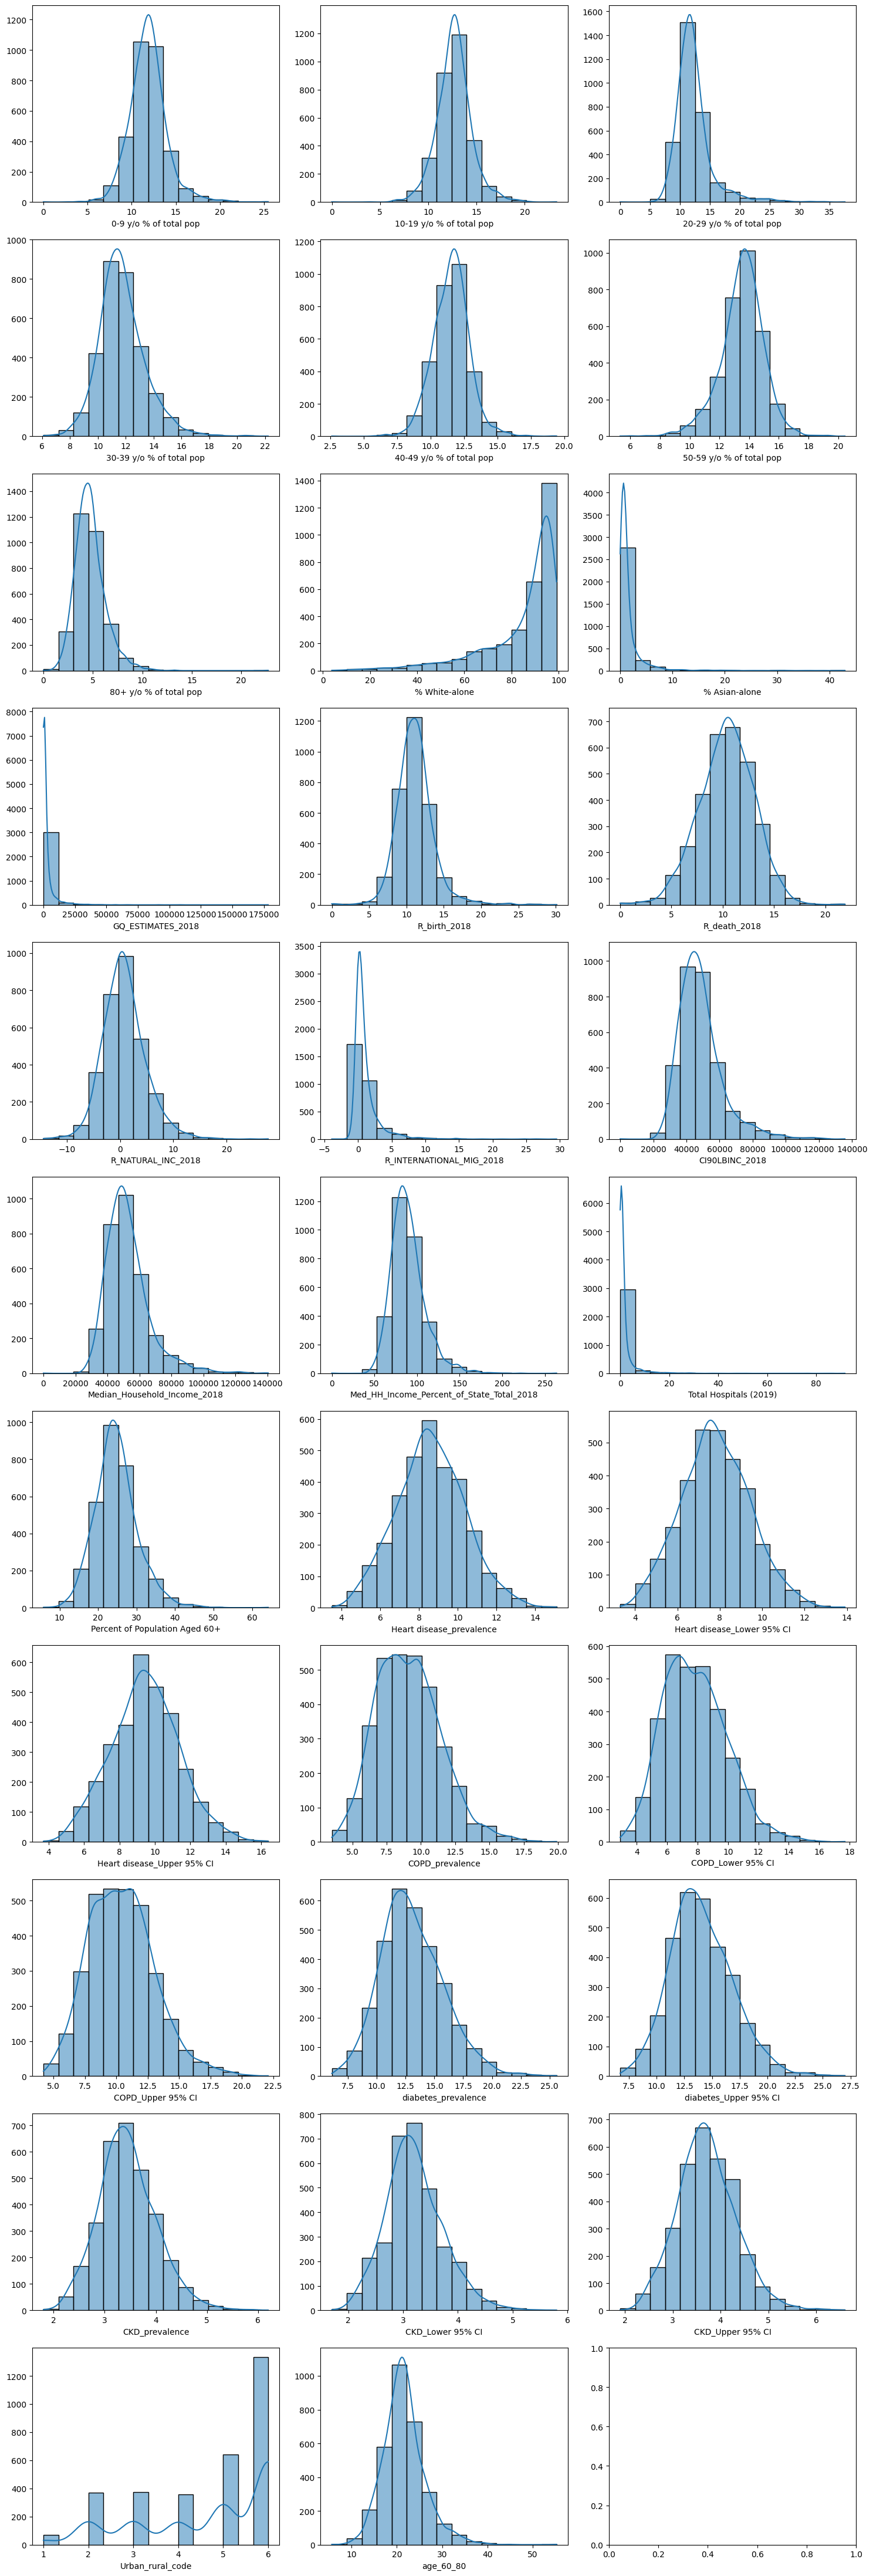

In [553]:
# Obtain the numerical columns
column_num = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns required for the subcharts
num_rows = (len(column_num) + 2) // 3
num_columns = 3

# Create subcharts
fig, axis = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))

# Generate histograms for each numerical variable
for i, column in enumerate(column_num):
    sns.histplot(ax=axis[i // num_columns, i % num_columns], data=df, x=column, bins=15, kde=True).set(ylabel=None)
    
plt.tight_layout()
plt.show()

In [554]:
# Dictionary for storing the number of zero values per column
number_zeros = {}

# Iterates over all columns of the numeric DataFrame
for column in column_num:
   # Counts the number of zero values in the column
    sum_zeros = (df[column] == 0).sum()
    
    # If there is at least one zero value, add the column and quantity to the dictionary.
    if sum_zeros > 0:
        number_zeros[column] = sum_zeros

for column, sum_zeros in number_zeros.items():
    print(f"{column}: {sum_zeros}")

0-9 y/o % of total pop: 1
10-19 y/o % of total pop: 1
20-29 y/o % of total pop: 1
80+ y/o % of total pop: 1
% Asian-alone: 9
GQ_ESTIMATES_2018: 65
R_birth_2018: 3
R_death_2018: 5
R_NATURAL_INC_2018: 68
R_INTERNATIONAL_MIG_2018: 395
CI90LBINC_2018: 1
Median_Household_Income_2018: 1
Med_HH_Income_Percent_of_State_Total_2018: 1


### 3) Multivariate analysis

In [555]:
# Columns with the selection of features
df.dtypes

0-9 y/o % of total pop                       float64
10-19 y/o % of total pop                     float64
20-29 y/o % of total pop                     float64
30-39 y/o % of total pop                     float64
40-49 y/o % of total pop                     float64
50-59 y/o % of total pop                     float64
80+ y/o % of total pop                       float64
% White-alone                                float64
% Asian-alone                                float64
GQ_ESTIMATES_2018                            float64
R_birth_2018                                 float64
R_death_2018                                 float64
R_NATURAL_INC_2018                           float64
R_INTERNATIONAL_MIG_2018                     float64
CI90LBINC_2018                               float64
Median_Household_Income_2018                 float64
Med_HH_Income_Percent_of_State_Total_2018    float64
Total Hospitals (2019)                       float64
Percent of Population Aged 60+               f

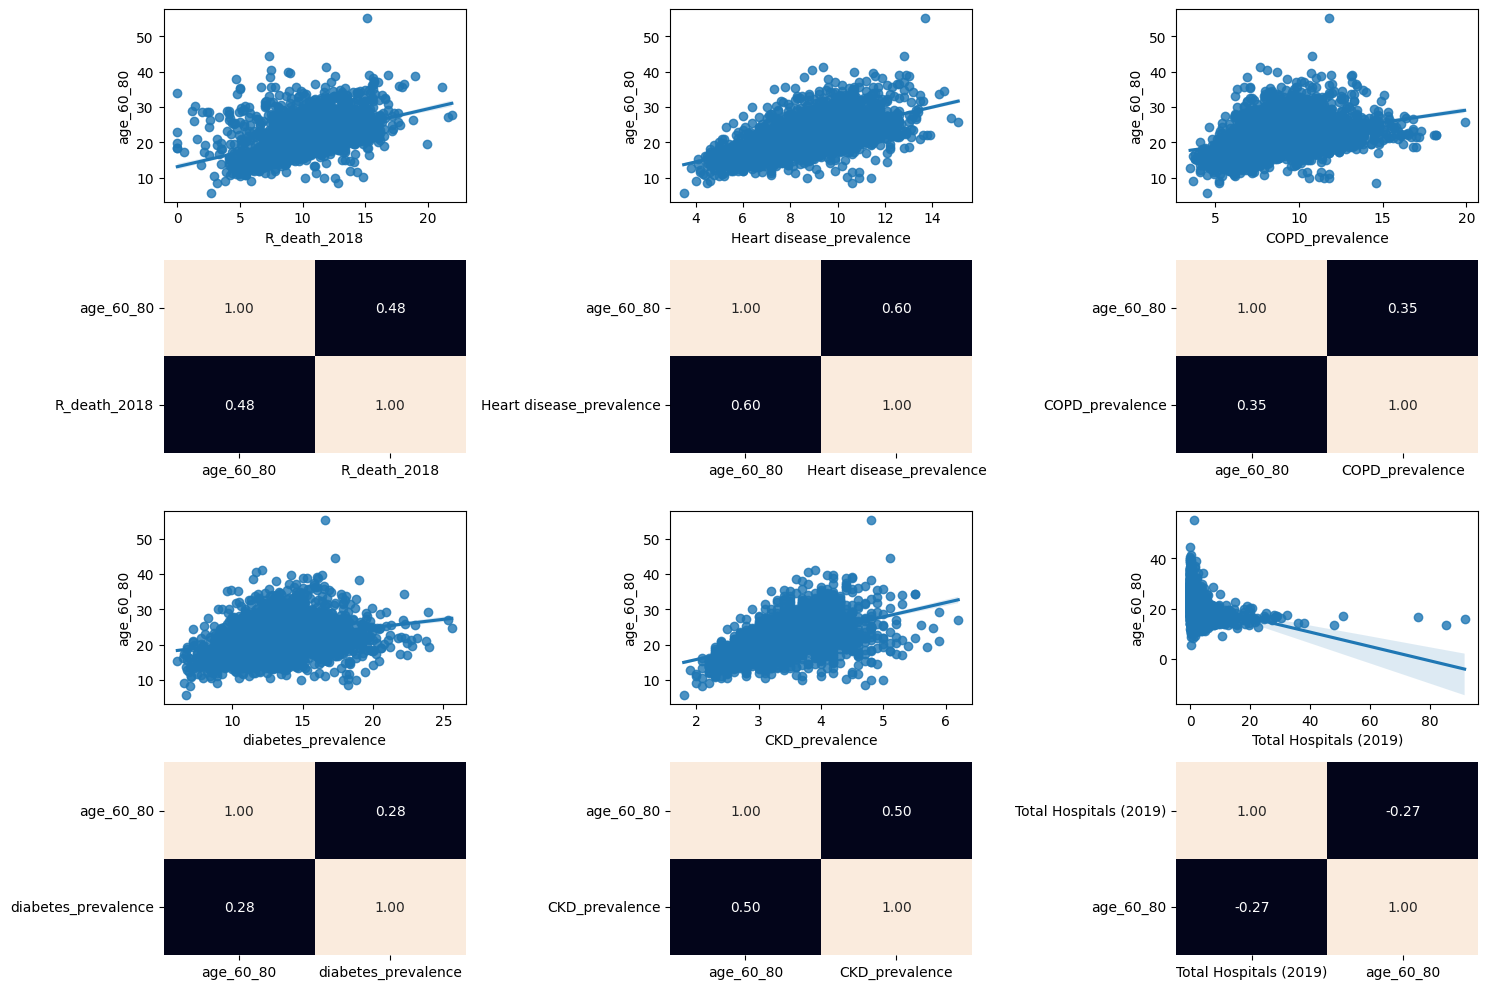

In [556]:
# Analysis N-N
fig, axis = plt.subplots(4, 3, figsize = (15, 10))


sns.regplot(ax = axis[0,0], data = df, x = "R_death_2018", y = "age_60_80")
sns.heatmap(df[["age_60_80", "R_death_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "Heart disease_prevalence", y = "age_60_80")
sns.heatmap(df[["age_60_80", "Heart disease_prevalence"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0,2], data = df, x = "COPD_prevalence", y = "age_60_80")
sns.heatmap(df[["age_60_80", "COPD_prevalence"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "diabetes_prevalence", y = "age_60_80")
sns.heatmap(df[["age_60_80", "diabetes_prevalence"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "CKD_prevalence", y = "age_60_80")
sns.heatmap(df[["age_60_80", "CKD_prevalence"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2, 2], data = df, x = "Total Hospitals (2019)", y = "age_60_80")
sns.heatmap(df[["Total Hospitals (2019)", "age_60_80"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

plt.tight_layout()
plt.show()

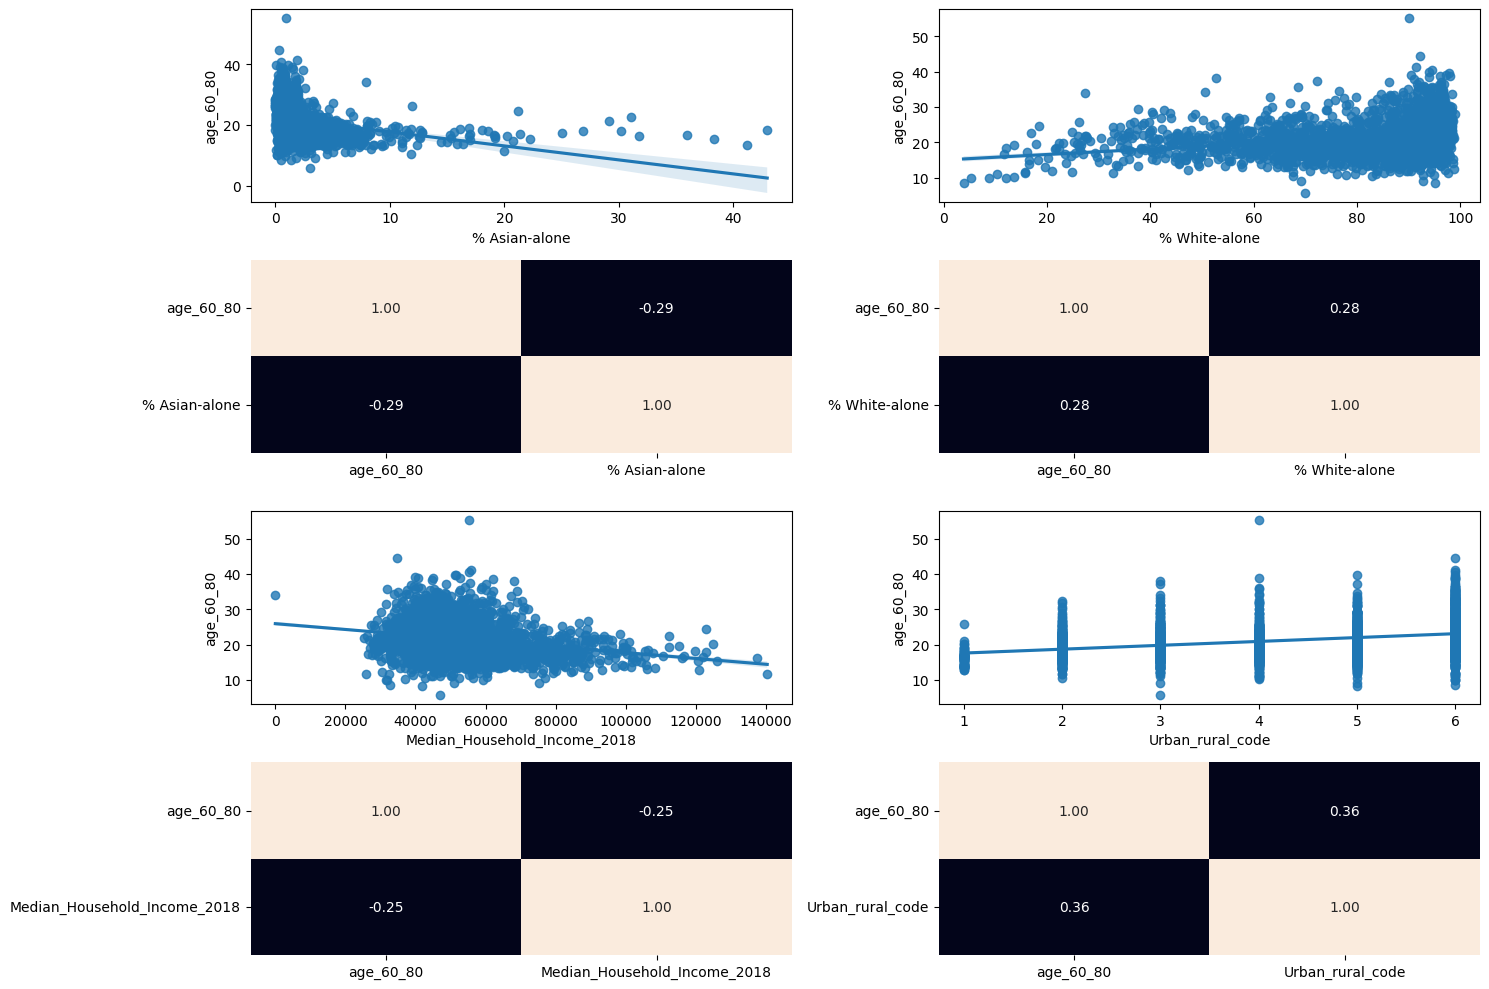

In [557]:
# Analysis N-N
fig, axis = plt.subplots(4, 2, figsize = (15, 10))


sns.regplot(ax = axis[0,0], data = df, x = "% Asian-alone", y = "age_60_80")
sns.heatmap(df[["age_60_80", "% Asian-alone"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "% White-alone", y = "age_60_80")
sns.heatmap(df[["age_60_80", "% White-alone"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2,0], data = df, x = "Median_Household_Income_2018", y = "age_60_80")
sns.heatmap(df[["age_60_80", "Median_Household_Income_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2,1], data = df, x = "Urban_rural_code", y = "age_60_80")
sns.heatmap(df[["age_60_80", "Urban_rural_code"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

The correlation map is not made as it would be illegible and confusing with such a large number of variables.
It is adjusted later.

### 4) Outlier analysis

In [558]:
df.describe()

,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Asian-alone,GQ_ESTIMATES_2018,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Urban_rural_code,age_60_80
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,11.871051,12.694609,12.283979,11.751535,11.556685,13.526733,4.733801,84.494109,1.554548,2576.335350,...,9.095223,7.835096,10.438567,13.073503,14.053726,3.446242,3.207516,3.710478,4.635350,21.581606
std,2.124081,1.815044,3.126297,1.696599,1.372935,1.481692,1.535028,16.348987,2.857088,6709.176105,...,2.344965,2.088071,2.613920,2.724351,2.824828,0.568059,0.527740,0.613069,1.510447,4.578953
min,0.000000,0.000000,0.000000,6.092789,2.631579,5.316361,0.000000,3.841985,0.000000,0.000000,...,3.500000,2.900000,4.200000,6.100000,6.700000,1.800000,1.700000,1.900000,1.000000,5.643954
25%,10.594639,11.674504,10.496774,10.689322,10.685197,12.738561,3.738648,79.620473,0.465659,174.750000,...,7.300000,6.300000,8.500000,11.200000,12.100000,3.100000,2.900000,3.300000,3.000000,18.734832
50%,11.802727,12.687422,11.772649,11.580861,11.618372,13.621339,4.565338,91.410189,0.739372,611.500000,...,8.900000,7.700000,10.300000,12.800000,13.800000,3.400000,3.200000,3.700000,5.000000,21.275602
75%,12.951840,13.659282,13.182260,12.639379,12.386083,14.429115,5.484143,95.521727,1.433411,2244.750000,...,10.600000,9.200000,12.100000,14.800000,15.900000,3.800000,3.500000,4.100000,6.000000,23.822771
max,25.460677,23.304372,37.570198,22.225129,19.430369,20.454545,22.727273,99.043785,42.952310,178334.000000,...,19.900000,17.700000,22.100000,25.600000,27.000000,6.200000,5.800000,6.600000,6.000000,55.269739


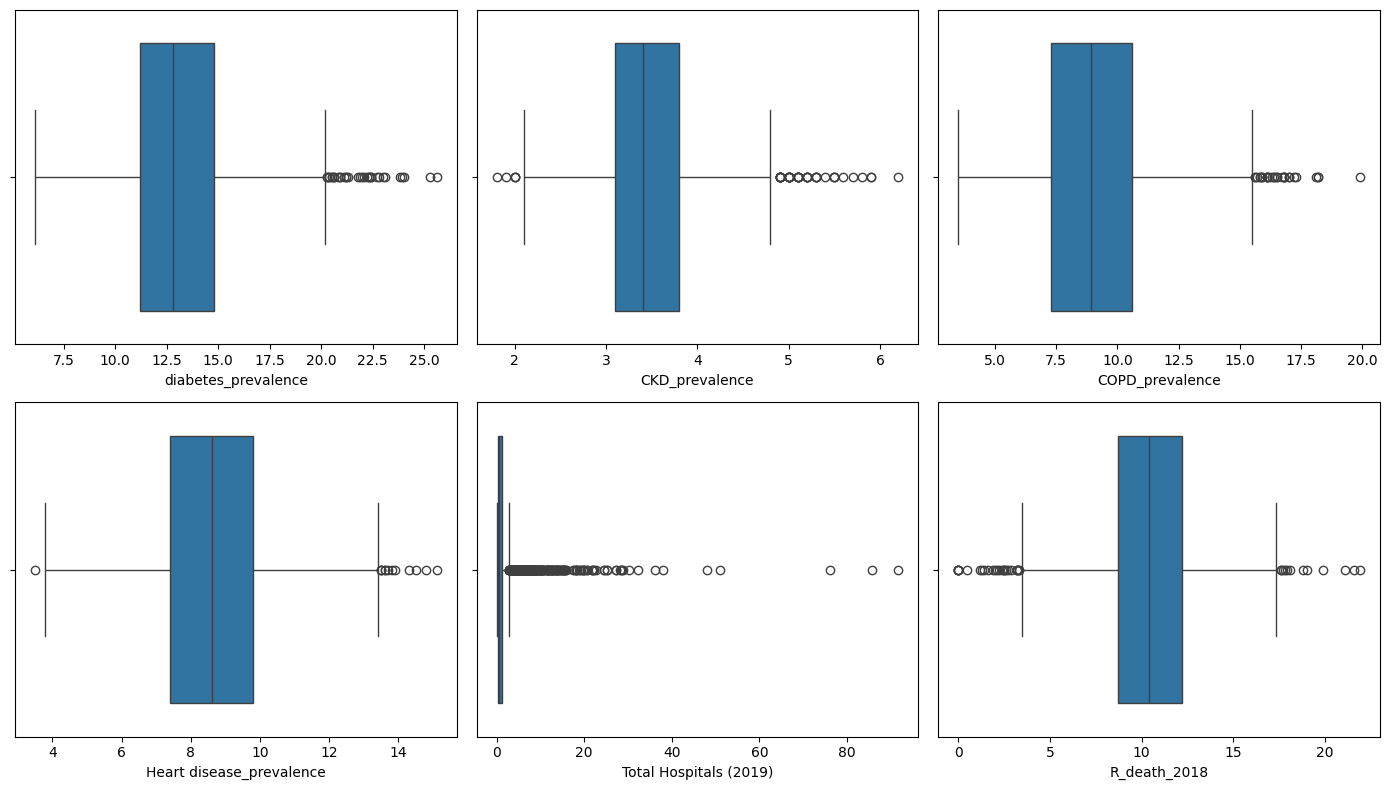

In [559]:
# Display outliers
fig, axis = plt.subplots(2, 3, figsize = (14, 8))

sns.boxplot(ax = axis[0, 0], data = df, x = "diabetes_prevalence")
sns.boxplot(ax = axis[0, 1], data = df, x = "CKD_prevalence")
sns.boxplot(ax = axis[0, 2], data = df, x = "COPD_prevalence")
sns.boxplot(ax = axis[1, 0], data = df, x = "Heart disease_prevalence")
sns.boxplot(ax = axis[1, 1], data = df, x = "Total Hospitals (2019)")
sns.boxplot(ax = axis[1, 2], data = df, x = "R_death_2018")

plt.tight_layout()
plt.show()

In [560]:
# Adjust outliers
columns_with_outliers = ["diabetes_prevalence", "CKD_prevalence", "COPD_prevalence", "Heart disease_prevalence", "Total Hospitals (2019)", "R_death_2018" ]

for column in columns_with_outliers:
    mean_without_zeros = df[df[column] != 0][column].mean()

    df[column] = df[column].replace(0, mean_without_zeros)

### 5) Split into Train and Test

In [561]:
X = df.drop("age_60_80", axis=1)
y = df["age_60_80"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

X_train.shape

(2512, 31)

### 6) Scaling of variables

In [562]:
# Scale your characteristics for regularised regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [565]:
# Convierte los conjuntos de datos escalados a DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [566]:
# Save 
X_train.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/models/X_train.csv", index=False)
y_train.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/models/y_train.csv", index=False)

X_test.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/models/X_test.csv", index=False)
y_test.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/models/y_test.csv", index=False)

X_train_scaled.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/models/X_train_scaled.csv", index=False)
X_test_scaled.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/models/X_test_scaled.csv", index=False)

df.to_csv("/workspaces/ML-Regularized-Linear-Models-pilarzarco/data/raw/Medical_32_var.csv")